In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-in-transactions-dataset/fraud_detection.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns 


data = pd.read_csv(r'/kaggle/input/fraud-detection-in-transactions-dataset/fraud_detection.csv')
df = pd.DataFrame(data)
df

,transaction_id,amount,merchant_type,device_type,label
0,1,46.93,travel,tablet,0
1,2,301.01,groceries,desktop,0
2,3,131.67,others,tablet,0
3,4,91.29,electronics,desktop,0
4,5,16.96,others,mobile,0
...,...,...,...,...,...
995,996,9.61,clothing,tablet,0
996,997,249.27,travel,mobile,0
997,998,14.71,others,mobile,0
998,999,300.05,travel,tablet,0


In [3]:
print(df['label'].value_counts())

print(df.describe())
print(df.isnull().sum())
print(df.isnull().any(axis=1).sum())

print(df.duplicated().sum())

print(df.info())

label
0    950
1     50
Name: count, dtype: int64
       transaction_id       amount        label
count     1000.000000  1000.000000  1000.000000
mean       500.500000    97.250560     0.050000
std        288.819436    97.250965     0.218054
min          1.000000     0.460000     0.000000
25%        250.750000    26.915000     0.000000
50%        500.500000    68.680000     0.000000
75%        750.250000   136.385000     0.000000
max       1000.000000   817.240000     1.000000
transaction_id    0
amount            0
merchant_type     0
device_type       0
label             0
dtype: int64
0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1000 non-null   int64  
 1   amount          1000 non-null   float64
 2   merchant_type   1000 non-null   object 
 3   device_type     1000 non-null   object 
 4   label           1000 

In [4]:
df.drop('transaction_id', axis=1, inplace=True)

print(df['merchant_type'].value_counts())
print(df['device_type'].value_counts())



merchant_type
others         214
clothing       212
travel         208
electronics    193
groceries      173
Name: count, dtype: int64
device_type
mobile     346
tablet     333
desktop    321
Name: count, dtype: int64


In [5]:
y = df['label']

df.drop('label', axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one = OneHotEncoder(drop='first')
ct = ColumnTransformer(transformers=[('onehot', one, ['merchant_type','device_type'])],remainder='passthrough')
df = ct.fit_transform(df)

encoded_cols = ct.get_feature_names_out()
df = pd.DataFrame(df, columns=encoded_cols)


In [7]:

print(df)
print(df.columns)

     onehot__merchant_type_electronics  onehot__merchant_type_groceries  \
0                                  0.0                              0.0   
1                                  0.0                              1.0   
2                                  0.0                              0.0   
3                                  1.0                              0.0   
4                                  0.0                              0.0   
..                                 ...                              ...   
995                                0.0                              0.0   
996                                0.0                              0.0   
997                                0.0                              0.0   
998                                0.0                              0.0   
999                                0.0                              1.0   

     onehot__merchant_type_others  onehot__merchant_type_travel  \
0                             0.

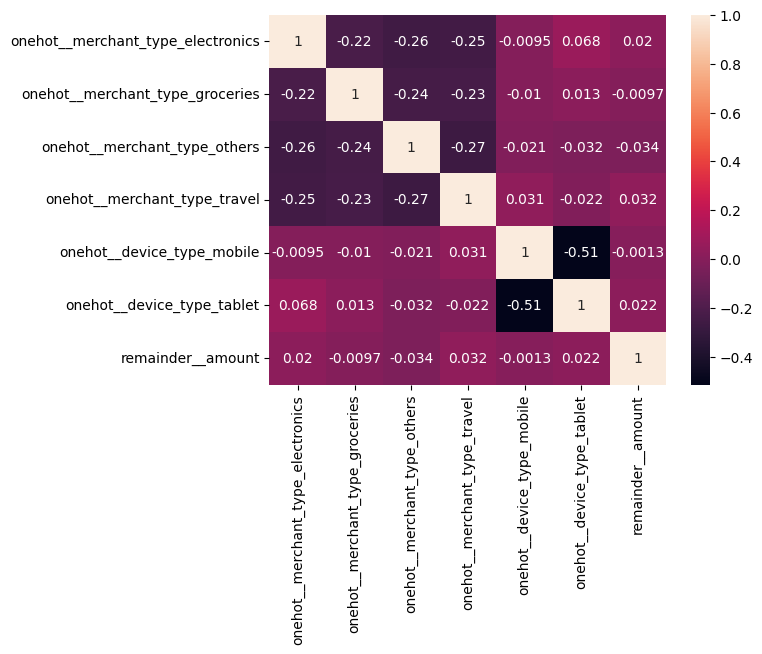

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

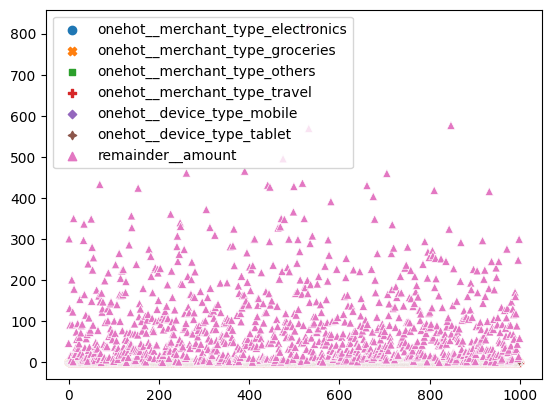

In [9]:
sns.scatterplot(df)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

df = standardScaler.fit_transform(df)

df_pca = pd.DataFrame(df)

print(df_pca)

            0         1        2         3         4         5         6
0   -0.489037 -0.457373 -0.52179  1.951331 -0.727360  1.415275 -0.517689
1   -0.489037  2.186400 -0.52179 -0.512471 -0.727360 -0.706577  2.096240
2   -0.489037 -0.457373  1.91648 -0.512471 -0.727360  1.415275  0.354101
3    2.044834 -0.457373 -0.52179 -0.512471 -0.727360 -0.706577 -0.061321
4   -0.489037 -0.457373  1.91648 -0.512471  1.374836 -0.706577 -0.826015
..        ...       ...      ...       ...       ...       ...       ...
995 -0.489037 -0.457373 -0.52179 -0.512471 -0.727360  1.415275 -0.901630
996 -0.489037 -0.457373 -0.52179  1.951331  1.374836 -0.706577  1.563949
997 -0.489037 -0.457373  1.91648 -0.512471  1.374836 -0.706577 -0.849162
998 -0.489037 -0.457373 -0.52179  1.951331 -0.727360  1.415275  2.086364
999 -0.489037  2.186400 -0.52179 -0.512471 -0.727360 -0.706577 -0.392898

[1000 rows x 7 columns]


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

encoded_pca = pca.fit_transform(df_pca)

df_pca = pd.DataFrame(encoded_pca,columns=['PCA1','PCA2'])
print(df_pca)


         PCA1      PCA2
0    1.097622 -1.315678
1    0.172373 -0.358119
2    1.362578  1.804499
3    0.445087 -0.492522
4   -1.573712  2.007844
..        ...       ...
995  1.442012  0.128699
996 -1.739843 -1.687476
997 -1.574413  2.011926
998  1.176520 -1.774850
999  0.096957  0.080790

[1000 rows x 2 columns]


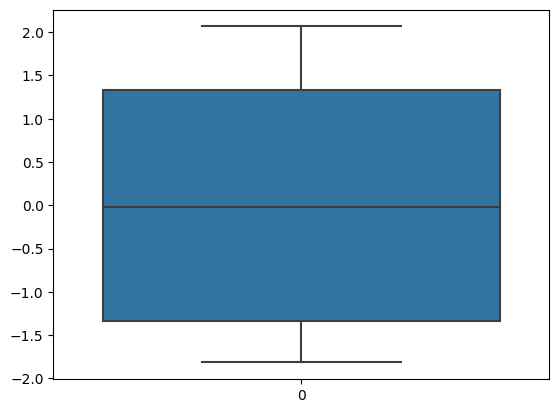

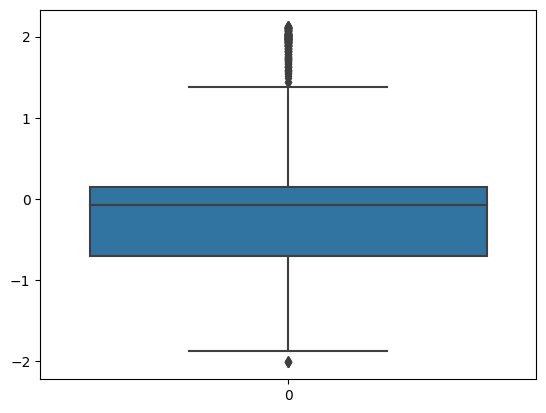

In [12]:
sns.boxplot(df_pca['PCA1'])
plt.show()

sns.boxplot(df_pca['PCA2'])
plt.show()


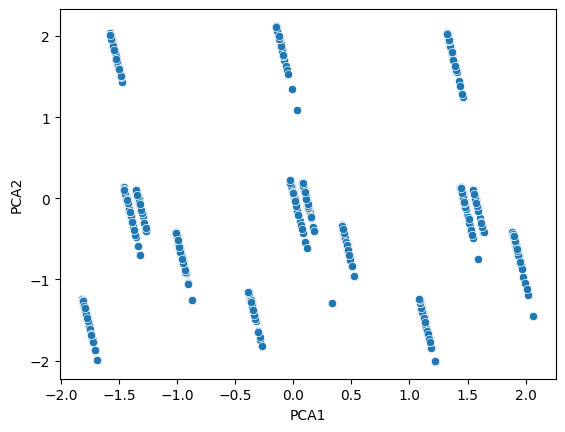

In [13]:
sns.scatterplot(data=df_pca,x='PCA1',y='PCA2')
plt.show()

In [14]:

from sklearn.ensemble import IsolationForest

isf = IsolationForest(contamination=0.05, random_state=42)
df_pca['isf'] = isf.fit_predict(df_pca)
print(df_pca['isf'].value_counts())

isf
 1    950
-1     50
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


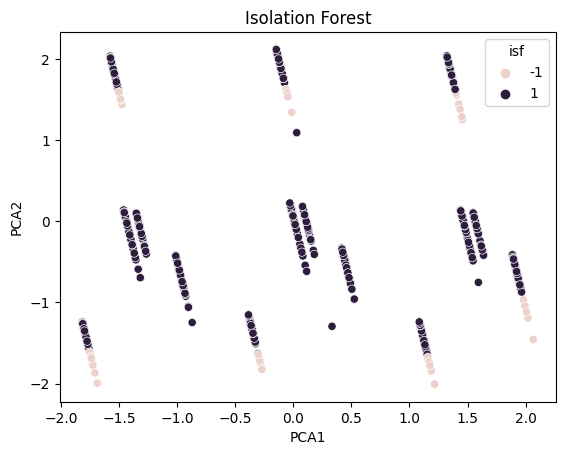

In [15]:
sns.scatterplot(data=df_pca, x='PCA1',y='PCA2', hue='isf')
plt.title('Isolation Forest')
plt.show()


dbscan
 6     132
 8     125
 1     124
 7      77
 10     77
 5      75
 4      70
 0      65
 2      65
 11     65
 9      64
 3      51
-1      10
Name: count, dtype: int64


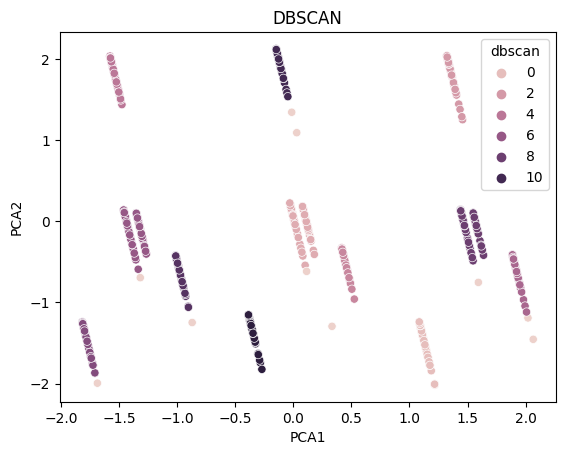

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10)
df_pca['dbscan'] = dbscan.fit_predict(df_pca[['PCA1','PCA2']])

print(df_pca['dbscan'].value_counts())

sns.scatterplot(data=df_pca, x='PCA1',y='PCA2', hue='dbscan')
plt.title('DBSCAN')
plt.show()

lf
 1    934
-1     66
Name: count, dtype: int64


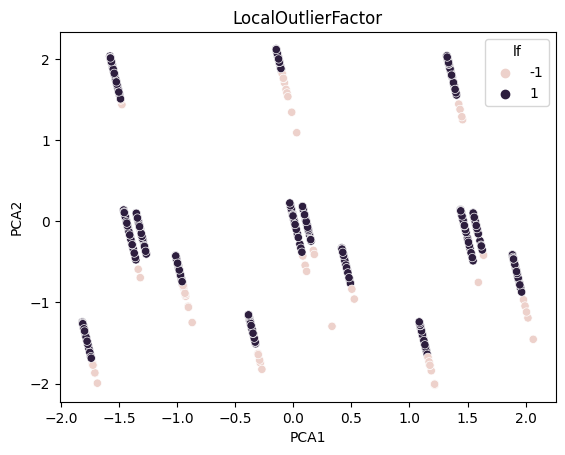

In [17]:
from sklearn.neighbors import LocalOutlierFactor

lf = LocalOutlierFactor()
df_pca['lf'] = lf.fit_predict(df_pca[['PCA1','PCA2']])
print(df_pca['lf'].value_counts())

sns.scatterplot(data=df_pca, x='PCA1',y='PCA2', hue='lf')
plt.title('LocalOutlierFactor')
plt.show()